# TASK 3

# Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.



Dataset :- https://www.kaggle.com/c/dogs-vs-cats/data

In [3]:
import numpy as np
import pandas as pd
import os
import zipfile
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
import random
from PIL import Image
import plotly.graph_objects as go
for dirname, _, filenames in os.walk('dogs-vs-cats'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dogs-vs-cats\sampleSubmission.csv
dogs-vs-cats\test1.zip
dogs-vs-cats\train.zip


# Extracting Data sets

In [5]:
with zipfile.ZipFile('dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall('train')
with zipfile.ZipFile('dogs-vs-cats/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('test')

# Setting up paths

In [6]:
train_dir = 'train/train'
test_dir = 'test/test1'

# Function to load and preprocess the images

In [7]:
def load_images(folder, img_size=(64, 64), sample_count=20, label_filter=None):
    images = []
    labels = []
    filenames = os.listdir(folder)
    
    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]
    
    random.shuffle(filenames)
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel values
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")
    
    return np.array(images), np.array(labels)

# Visualize images with labels

In [8]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.flatten()
    
    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Load and visualize cat images

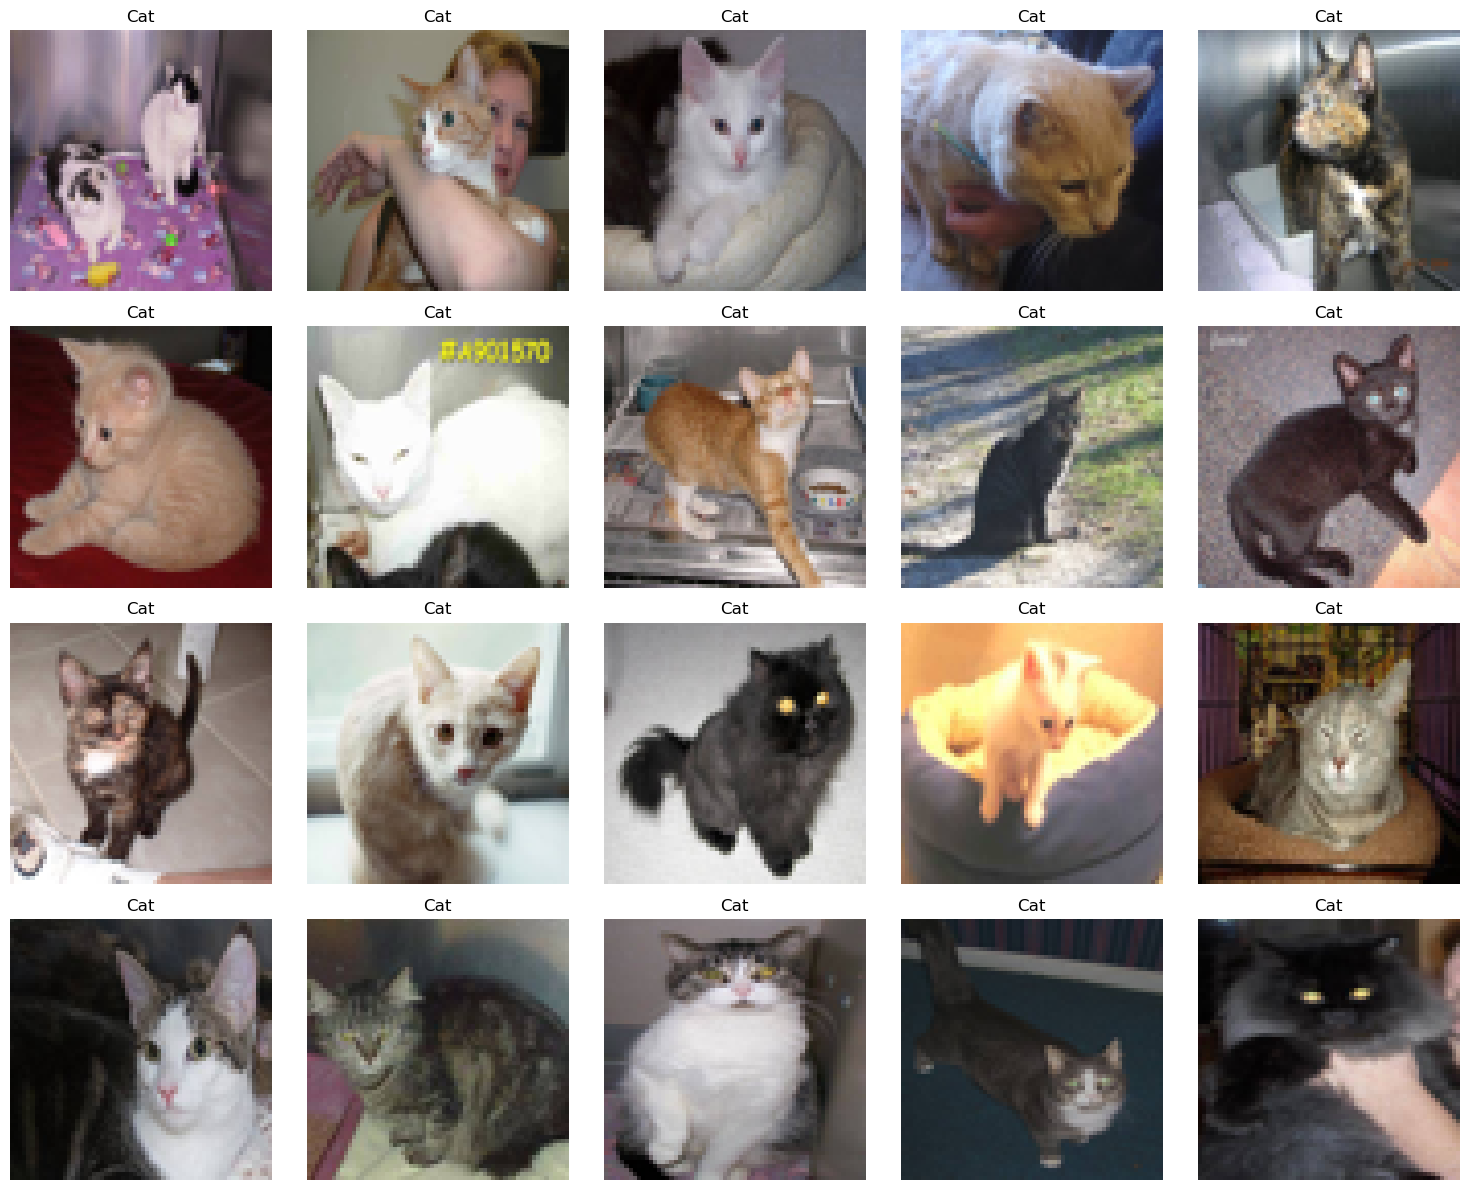

In [9]:
cat_images, cat_labels = load_images(train_dir, sample_count=20, label_filter='cat')
visualize_images(cat_images, cat_labels, sample_count=20)

# Load and visualize dog images

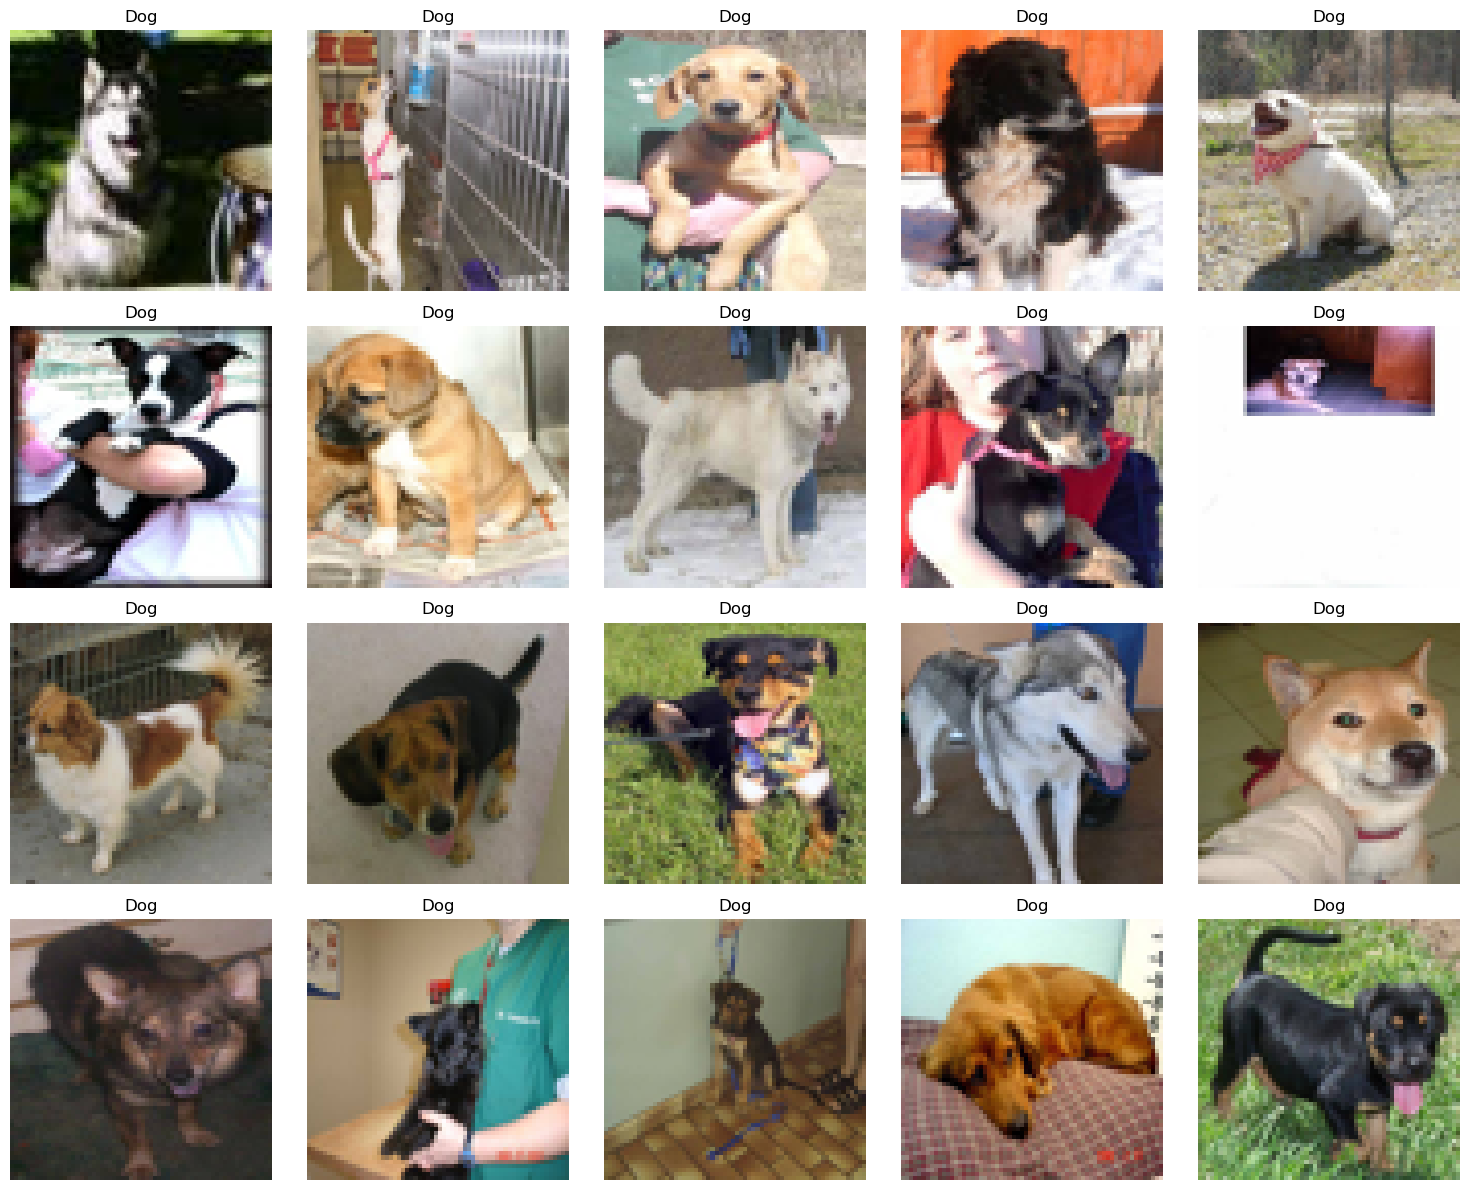

In [10]:
dog_images, dog_labels = load_images(train_dir, sample_count=20, label_filter='dog')
visualize_images(dog_images, dog_labels, sample_count=20)


# Load and visualize both cat and dog images

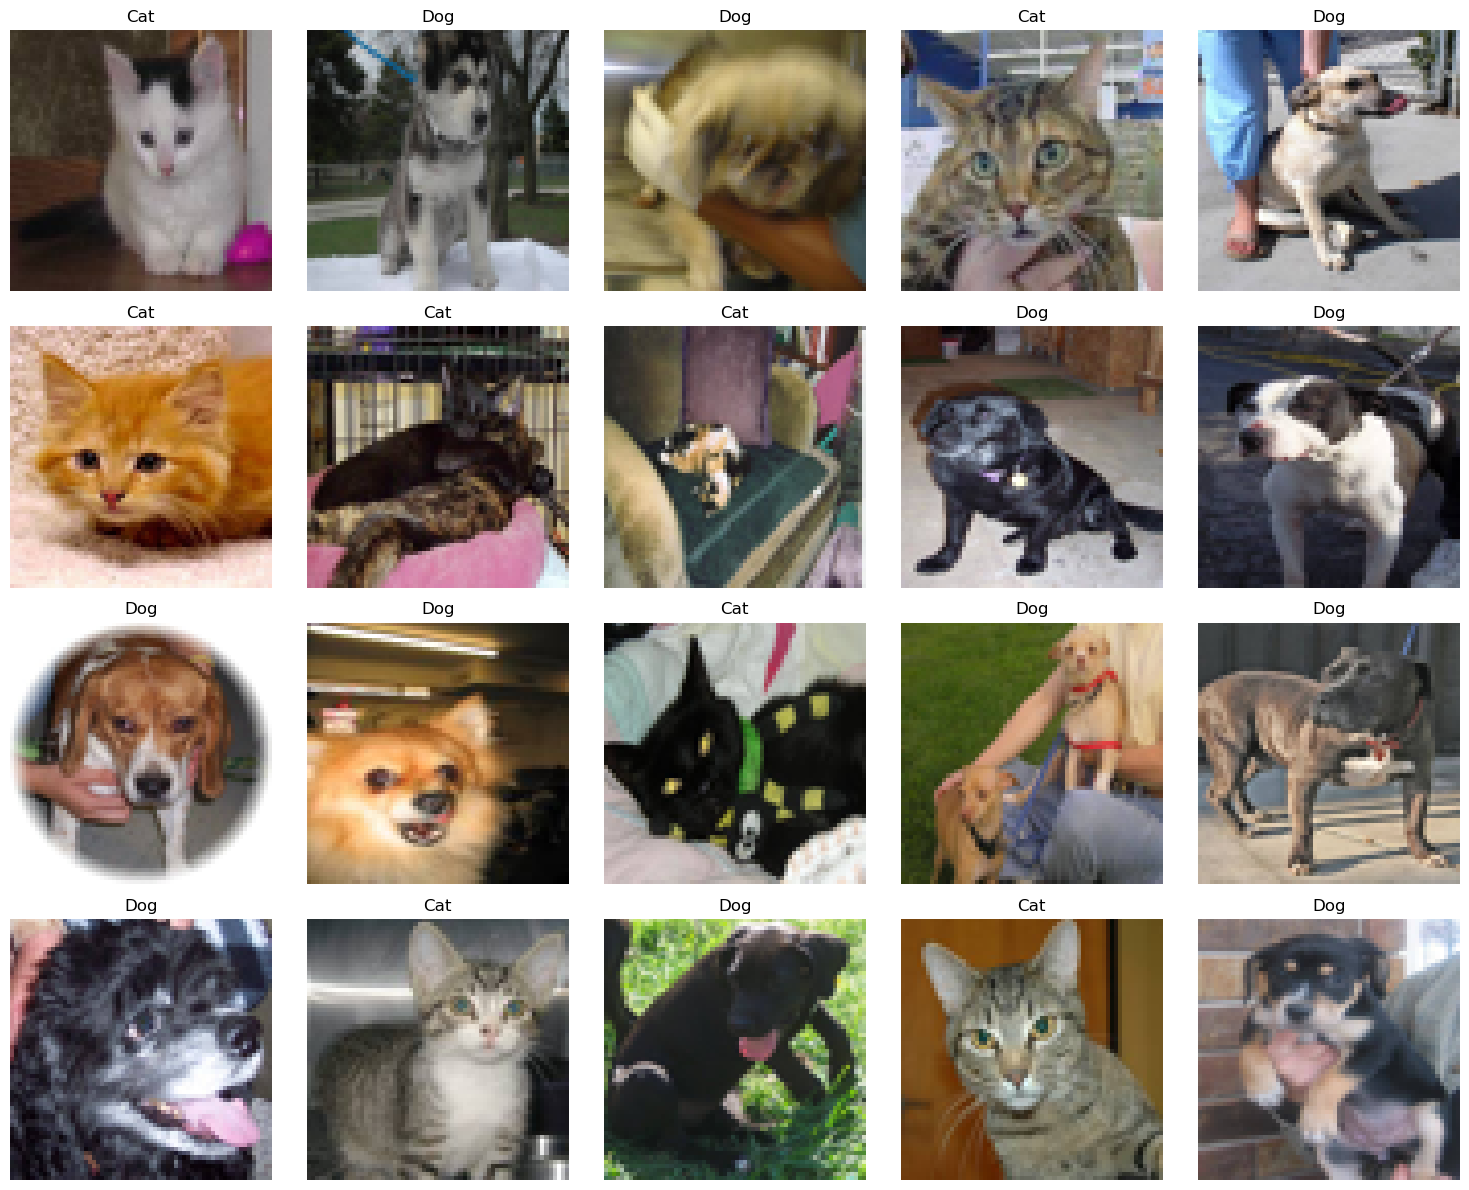

In [11]:
all_images, all_labels = load_images(train_dir, sample_count=20)
visualize_images(all_images, all_labels, sample_count=20)

# Loading and preprocessing the training data

In [12]:
images, labels = load_images(train_dir, sample_count=10000) 
images = images / 255.0

# Display the shape of the images array

In [14]:
print("Shape of images array:", images.shape)

Shape of images array: (10000, 64, 64, 3)


# Display the shape of the first image

In [16]:
print("Shape of the first image:", images[0].shape)

Shape of the first image: (64, 64, 3)


# Display the first 2 images

In [17]:
print(images[:2]) 
print(labels[:2])

[[[[0.0013687  0.00139946 0.00104575]
   [0.00149173 0.00143022 0.00112265]
   [0.00150711 0.00150711 0.00110727]
   ...
   [0.0030296  0.00261438 0.00239908]
   [0.00299885 0.00261438 0.0023837 ]
   [0.00286044 0.00250673 0.00229143]]

  [[0.00161476 0.00159938 0.00124567]
   [0.00147636 0.00149173 0.00095348]
   [0.00143022 0.00147636 0.00092272]
   ...
   [0.00298347 0.00258362 0.00235294]
   [0.00287582 0.00249135 0.00227605]
   [0.00296809 0.00261438 0.00239908]]

  [[0.00158401 0.00150711 0.00099962]
   [0.00143022 0.00146098 0.00086121]
   [0.00152249 0.00158401 0.00101499]
   ...
   [0.00306036 0.00266052 0.00242983]
   [0.0031065  0.00272203 0.00247597]
   [0.00326028 0.0028912  0.00267589]]

  ...

  [[0.00150711 0.00163014 0.00112265]
   [0.00135333 0.00149173 0.00101499]
   [0.00119954 0.00133795 0.00087659]
   ...
   [0.00322953 0.00301423 0.00290657]
   [0.00339869 0.00326028 0.00319877]
   [0.00361399 0.00352172 0.00349097]]

  [[0.00135333 0.00153787 0.00099962]
   [0.0

# Flattening the images for the SVM input

In [18]:
n_samples, img_height, img_width, img_channels = images.shape
images_flat = images.reshape(n_samples, -1)

# Standardizing the features

In [19]:
scaler = StandardScaler()
images_flat_scaled = scaler.fit_transform(images_flat)

# Applying t-SNE

In [20]:
perplexity = min(30, n_samples - 1)
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
images_tsne = tsne.fit_transform(images_flat_scaled)

# Splitting the dataset into training and test sets

In [21]:
X_train, X_val, y_train, y_val = train_test_split(images_flat_scaled, labels, test_size=0.2, random_state=42)

In [22]:
X_train

array([[ 0.01247182,  0.16438173,  0.50028256, ..., -0.80024729,
        -0.572316  , -0.21153025],
       [-0.21705332, -0.10987892, -0.09196973, ..., -0.43285466,
        -0.33180478, -0.37244537],
       [-0.44657846,  0.04890356, -0.3316909 , ..., -0.90311723,
        -0.40696453, -0.57724644],
       ...,
       [ 1.47569459,  0.77064213,  0.44387758, ...,  1.02202018,
         0.52501646, -0.07987242],
       [-0.05925478, -0.10987892, -0.02146351, ...,  1.3453257 ,
         1.18642233,  1.16356264],
       [-0.04490946, -0.10987892, -0.23298218, ...,  1.09549871,
         1.30667794,  1.63167937]])

In [23]:
X_val

array([[ 0.60062999,  0.2798599 ,  0.30286513, ...,  1.11019442,
         1.09623062,  1.10504805],
       [ 1.03098963,  1.62229364,  2.10782449, ..., -0.37407183,
         0.04399401, -0.85519075],
       [ 1.96343551,  2.04090201,  2.10782449, ...,  1.90376251,
         2.04324357,  2.0997961 ],
       ...,
       [-0.28877992, -0.44187866, -0.48680459, ..., -0.2712019 ,
        -0.21154916, -0.38707402],
       [-0.64741295, -0.51405252, -0.47270335, ...,  0.71341037,
         1.03610281,  1.13430535],
       [-0.37485185, -0.83161749, -1.00855066, ...,  0.19906068,
        -0.22658112, -0.69427562]])

In [24]:
y_val

array([1, 1, 0, ..., 1, 0, 0])

# Checking class distribution

In [25]:
unique, counts = np.unique(labels, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")

Class distribution: {0: 5013, 1: 4987}


In [26]:
def plot_tsne_data(tsne_data, labels, title):
    df_tsne = pd.DataFrame()
    df_tsne['X'] = tsne_data[:, 0]
    df_tsne['Y'] = tsne_data[:, 1]
    df_tsne['Label'] = labels
    df_tsne['Label'] = df_tsne['Label'].map({0: 'Cat', 1: 'Dog'})
    
    fig = px.scatter(df_tsne, x='X', y='Y', color='Label', title=title)
    fig.show()

plot_tsne_data(images_tsne, labels, 't-SNE visualization of Cats vs Dogs')

# Training the SVM model

In [27]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

# Making predictions on the validation set

In [28]:
y_val_pred = svm.predict(X_val)

In [29]:
y_val_pred

array([1, 1, 0, ..., 1, 1, 1])

# Evaluating the model

In [30]:
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred, target_names=['Cat', 'Dog'])
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Accuracy

In [31]:
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.5415


# Classification Report

In [32]:
print('Validation Classification Report:')
print(val_class_report)

Validation Classification Report:
              precision    recall  f1-score   support

         Cat       0.54      0.59      0.56       997
         Dog       0.55      0.50      0.52      1003

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000



# Confusion Matrix

Validation Confusion Matrix:
[[585 412]
 [505 498]]


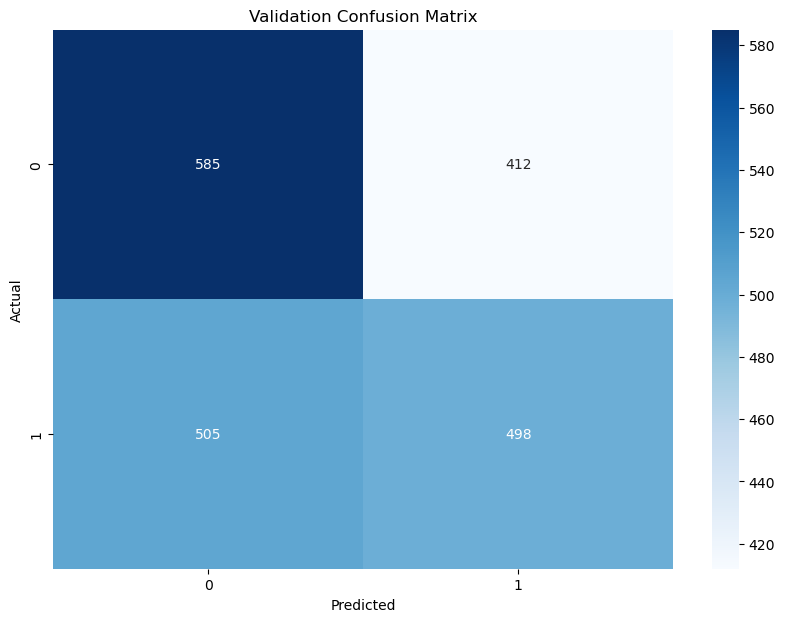

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print('Validation Confusion Matrix:')
print(val_conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Validation Confusion Matrix')
plt.show()

# Loading and preprocessing the test data

In [34]:
test_images, test_labels = load_images(test_dir)  
test_images = test_images / 255.0

# Flattening the test images for the SVM input

In [35]:
n_test_samples, test_img_height, test_img_width, test_img_channels = test_images.shape
test_images_flat = test_images.reshape(n_test_samples, -1)
test_images_flat_scaled = scaler.transform(test_images_flat)

# Standardizing the test features

In [36]:
test_images_flat_scaled = scaler.transform(test_images_flat)

# Applying t-SNE for visualization on test data

In [37]:
# Determine a new perplexity value for the test data
test_perplexity = min(30, n_test_samples - 1)

# Create a new t-SNE instance for the test data
test_tsne = TSNE(n_components=2, perplexity=test_perplexity, random_state=42)
test_images_tsne = test_tsne.fit_transform(test_images_flat_scaled)

# Making predictions on the test set

In [38]:
y_test_pred = svm.predict(test_images_flat_scaled)

In [39]:
y_test_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

# RESULTS


#MODEL INTERPRETATION

Validation Accuracy: The model achieved a validation accuracy of 54%, indicating it correctly classified slightly over half of the validation images.

Classification Report:
Cats: Precision and recall are 54%, showing the model struggles to consistently identify cats accurately.
Dogs: Precision and recall are 55%, indicating only marginally better performance compared to cats.


INSIGHTS

The model's performance is close to random guessing, suggesting significant improvements are needed in feature extraction or preprocessing.
Focus on augmenting the dataset with higher-quality and more diverse images to reduce overfitting or class imbalance.
Consider hyperparameter tuning (e.g., kernel type, regularization) or exploring more advanced feature extraction techniques like pre-trained CNN models to enhance classification performance.